# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

## [Q1 10 points] Read in data

Read in the files gold.txt and labels.txt. The gold DataFrame should have columns url and category, while the labels DataFrame should have columns turk, url and category. You will have to pick the right separator.

In [2]:
gold = pd.read_csv("gold.txt", delimiter='\t', header=None, names=['url', 'category'])
labels = pd.read_csv("labels.txt", delimiter='\t', header=None, names=['turk', 'url', 'category'])

gold.shape, labels.shape

((1517, 2), (92721, 3))

In [3]:
len(labels["url"].unique())

11040

## [Q2 10 points] Split into two DataFrames

Split the labels DataFrame into two: labels on gold and labels unknown, the former containing all rows where the url is present in the gold set, and the latter one contains all remaining rows of labels.

In [4]:
labels_on_gold = labels.merge(gold, on = 'url', how = 'inner', suffixes=["_label", "_gold"])
labels_on_gold.shape

(3324, 4)

In [5]:
labels_unknown = labels[~labels["url"].isin(labels_on_gold["url"])]
labels_unknown.shape

(89397, 3)

## [Q3 10 points] Compute accuracies of turks
Create a rater goodness DataFrame that is indexed by turk, and has two columns: the number of ratings, and the average correctness of ratings for each turk (both on gold set urls).

In [6]:
labels_on_gold["correct"] = labels_on_gold.apply(lambda x : 1 if x["category_gold"] == x["category_label"] else 0, axis = 1)

In [7]:
labels_on_gold.columns

Index(['turk', 'url', 'category_label', 'category_gold', 'correct'], dtype='object')

In [8]:
rater_goodness = labels_on_gold.groupby("turk").agg({'correct':['count', 'mean']}).droplevel(0, axis = 1)

rater_goodness.columns = ['number_of_ratings', 'average_correctness']

rater_goodness.head(10)

,number_of_ratings,average_correctness
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
...,...,...
AYWOBMTEGFVVI,1,0.000000
AZ1S5BIG5R6P6,35,0.714286
AZSDW7JJL5VA7,100,0.680000


In [94]:
rater_goodness.head(10)

,number_of_ratings,average_correctness,odds,number_of_ratings_scale,average_correctness_scale
turk,,,,,
A112DVP1KG4QZU,1,1.000000,1000.000000,0.005464,1.000000
A1253FXHCZ9CWM,29,0.517241,1.069214,0.158470,0.517241
A12CY1Q7XKJJDE,1,1.000000,1000.000000,0.005464,1.000000
A12RE8G66WTO8B,20,0.750000,2.988048,0.109290,0.750000
A12Y1GTGIQDGRA,3,0.333333,0.499251,0.016393,0.333333
A13CEW9JGDWGX1,1,1.000000,1000.000000,0.005464,1.000000
A13OE9GBRJ0S2U,4,0.750000,2.988048,0.021858,0.750000
A14IQ4GLNWNPOJ,1,1.000000,1000.000000,0.005464,1.000000
A153PKAL7OAY36,148,0.722973,2.600369,0.808743,0.722973


## [Q4 10 points] Odds ratios
If someone is correct p fraction of the time, the odds of success are defined as:
odds = p/(1.001 − p).

Attach a column called odds to the rater goodness DataFrame, using the average correctness of the turk as his or her p.


In [9]:
rater_goodness["odds"] = rater_goodness["average_correctness"].apply(lambda x : x / (1.001 - x))

In [98]:
rater_goodness.sort_values(by='number_of_ratings', ascending = False).head(20)

,number_of_ratings,average_correctness,odds,number_of_ratings_scale,average_correctness_scale
turk,,,,,
A112DVP1KG4QZU,1,1.0,1000.0,0.005464,1.0
A24ULCUOSCOJXC,1,1.0,1000.0,0.005464,1.0
A3BH9WUYDK3LTT,2,1.0,1000.0,0.010929,1.0
A3AY01XG3S0N6G,3,1.0,1000.0,0.016393,1.0
A3A3J87AG178Z,2,1.0,1000.0,0.010929,1.0
A39VY8MOYLYENC,1,1.0,1000.0,0.005464,1.0
A39MWGZ6R4VKZ2,1,1.0,1000.0,0.005464,1.0
A397RDM7QLZEG1,2,1.0,1000.0,0.010929,1.0
A37FYSR72FJ5HV,1,1.0,1000.0,0.005464,1.0


## [Q5 10 points] Most accurate turks
List the top 10 most accurate turks who have rated at least 20 gold set URLs.

In [100]:
rater_goodness[rater_goodness["number_of_ratings"] >=20].sort_values(by = "average_correctness", ascending = False).head(10)

,number_of_ratings,average_correctness,odds,number_of_ratings_scale,average_correctness_scale
turk,,,,,
A2U0R4X38GUKZE,20,0.950000,18.627451,0.109290,0.950000
A22C0PJUBFJTI0,36,0.916667,10.869565,0.196721,0.916667
A23YQUBXZPKILZ,24,0.875000,6.944444,0.131148,0.875000
ATVALOQVDCMZW,103,0.854369,5.826657,0.562842,0.854369
A1HIXWH4OXT8S4,40,0.825000,4.687500,0.218579,0.825000
A3220HG1O83HQ4,22,0.818182,4.475385,0.120219,0.818182
A32W20KGQXS0LL,25,0.800000,3.980100,0.136612,0.800000
A20PWAB7G3HDHU,20,0.800000,3.980100,0.109290,0.800000
AJSJVK40F5HM6,28,0.785714,3.649635,0.153005,0.785714


In [11]:
rater_goodness[rater_goodness["number_of_ratings"] >=20].sort_values(by = "average_correctness", ascending = False)[:10].index.values.tolist()

['A2U0R4X38GUKZE',
 'A22C0PJUBFJTI0',
 'A23YQUBXZPKILZ',
 'ATVALOQVDCMZW',
 'A1HIXWH4OXT8S4',
 'A3220HG1O83HQ4',
 'A32W20KGQXS0LL',
 'A20PWAB7G3HDHU',
 'AJSJVK40F5HM6',
 'A31OCN4MNHUQ6W']

## [Q6 10 points] Rating counts versus accuracy

One may imagine that a committed and accurate turk will rate lots of URLs. On the other hand, perhaps it is only the spammers who have the time to rate lots of URLs.
 
Is number of ratings by a turker on gold set URLs related to his or her accuracy? There’s no fixed answer; just try to show some evidence for your answer.

In [12]:
for col in ["number_of_ratings", "average_correctness"]:
    col_scale = col + '_scale'
    rater_goodness[col_scale] = rater_goodness[col]/ (rater_goodness[col].max() - rater_goodness[col].min())

In [13]:
rater_goodness

,number_of_ratings,average_correctness,odds,number_of_ratings_scale,average_correctness_scale
turk,,,,,
A112DVP1KG4QZU,1,1.000000,1000.000000,0.005464,1.000000
A1253FXHCZ9CWM,29,0.517241,1.069214,0.158470,0.517241
A12CY1Q7XKJJDE,1,1.000000,1000.000000,0.005464,1.000000
A12RE8G66WTO8B,20,0.750000,2.988048,0.109290,0.750000
A12Y1GTGIQDGRA,3,0.333333,0.499251,0.016393,0.333333
...,...,...,...,...,...
AYWOBMTEGFVVI,1,0.000000,0.000000,0.005464,0.000000
AZ1S5BIG5R6P6,35,0.714286,2.491281,0.191257,0.714286
AZSDW7JJL5VA7,100,0.680000,2.118380,0.546448,0.680000


<AxesSubplot:xlabel='number_of_ratings_scale', ylabel='average_correctness_scale'>

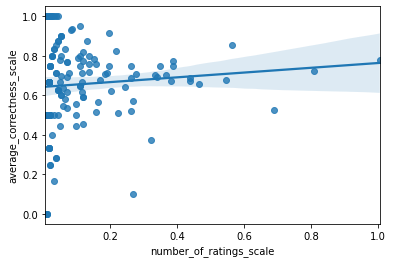

In [14]:
sns.regplot(x="number_of_ratings_scale", y="average_correctness_scale", data=rater_goodness)

#### Yes, number of ratings by a turker on gold set URLs related to his or her accuracy.

## [Q7 13 points] Overall predicted odds

Consider each url u that is not in the gold set, and each category c. For the pair (u, c), calculate the product of odds of all turks who 
(a) rated url u as category c, and 
(b) have rated more gold set urls than 75% of all turks who rated at least one gold-set url.

For example, if you find that there are 269 turks who rated at least one gold-set url, you want to select only the turks who have rated more gold-set urls than 75% of these 269 turks. We can think of these as our “reliable” turks. Now, our belief that url u belongs to category c depends on how many “reliable” turks rated u as c; specifically, our belief is based on the product of their reliability scores (i.e., their odds).

We shall call such products of odds the overall odds henceforth.

In [15]:
rater_goodness["number_of_ratings"].quantile(0.75)

11.0

In [21]:
mark_75 = rater_goodness["number_of_ratings"].quantile(0.75)
top25_turks = rater_goodness[rater_goodness["number_of_ratings"] > mark_75].index.values
len(top25_turks)

66

In [22]:
labels_unknown_reliable = labels_unknown[labels_unknown["turk"].isin(top25_turks)]

In [102]:
labels_unknown_reliable.shape

(40621, 3)

In [23]:
correct_category_df = labels_unknown_reliable.groupby(["url"], as_index = False)["category"].agg(lambda x:x.value_counts().index[0])
labels_unknown_reliable_merged = labels_unknown_reliable.merge(correct_category_df, on = "url", suffixes=["", "_correct"], how = "inner")

In [24]:
labels_unknown_reliable_merged

,turk,url,category,category_correct
0,A1PXXEOGQ76RNJ,http://000.cc,G,G
1,A1PXXEOGQ76RNJ,http://000.cc,G,G
2,A21US576U8SCO4,http://000.cc,G,G
3,A1PXXEOGQ76RNJ,http://0000.jp,G,G
4,A1XFA0A9Z3LAZJ,http://0000.jp,G,G
...,...,...,...,...
40616,A4GP97LAQCCHJ,http://zynga.com,G,G
40617,A1PXXEOGQ76RNJ,http://zz868.com,G,G
40618,A4AD9ZMVU9SVA,http://zz868.com,P,G
40619,A21US576U8SCO4,http://zzx.cc,G,G


In [26]:
labels_unknown_reliable_merged["correct"] = labels_unknown_reliable_merged.apply(lambda x : 1 if x["category"] == x["category_correct"] else 0, axis = 1)

rater_goodness_reliable_unknown = labels_unknown_reliable_merged.groupby("turk", as_index = False).agg(number_of_ratings = ('correct', 'count'),
                                                                                                       average_correctness = ('correct', 'mean'))

In [27]:
rater_goodness_reliable_unknown["odds"] = rater_goodness_reliable_unknown["average_correctness"].apply(lambda x : x / (1.001 - x))

In [30]:
labels_unknown_reliable_odds = labels_unknown_reliable_merged.merge(rater_goodness_reliable_unknown[["turk", "odds"]], right_on="turk", left_on="turk", how = 'inner') 

In [31]:
labels_unknown_reliable_odds.head()

,turk,url,category,category_correct,correct,odds
0,A1PXXEOGQ76RNJ,http://000.cc,G,G,1,143.678504
1,A1PXXEOGQ76RNJ,http://000.cc,G,G,1,143.678504
2,A1PXXEOGQ76RNJ,http://0000.jp,G,G,1,143.678504
3,A1PXXEOGQ76RNJ,http://000relationships.com,G,G,1,143.678504
4,A1PXXEOGQ76RNJ,http://000relationships.com,G,G,1,143.678504


In [38]:
unknown_urls_odds = labels_unknown_reliable_odds.groupby(['url', 'category'], as_index=False).agg(overall_odds = ('odds', 'prod'))
unknown_urls_odds

,url,category,overall_odds
0,http://0-101.net,G,4.409421e+01
1,http://000.cc,G,3.936769e+05
2,http://0000.jp,G,4.952204e+06
3,http://000relationships.com,G,7.594484e+09
4,http://000relationships.com,P,2.220370e+00
...,...,...,...
13978,http://zynga.com,G,1.450293e+04
13979,http://zz868.com,G,1.436785e+02
13980,http://zz868.com,P,2.220370e+00
13981,http://zzx.cc,G,1.907025e+01


In [39]:
labels_unknown_reliable_odds = labels_unknown_reliable_odds.merge(unknown_urls_odds, on=['url', 'category'])

In [40]:
labels_unknown_reliable_odds

,turk,url,category,category_correct,correct,odds,prod_odds,overall_odds
0,A1PXXEOGQ76RNJ,http://000.cc,G,G,1,143.678504,3.936769e+05,3.936769e+05
1,A1PXXEOGQ76RNJ,http://000.cc,G,G,1,143.678504,3.936769e+05,3.936769e+05
2,A21US576U8SCO4,http://000.cc,G,G,1,19.070246,3.936769e+05,3.936769e+05
3,A1PXXEOGQ76RNJ,http://0000.jp,G,G,1,143.678504,4.952204e+06,4.952204e+06
4,A21US576U8SCO4,http://0000.jp,G,G,1,19.070246,4.952204e+06,4.952204e+06
...,...,...,...,...,...,...,...,...
40616,amurray,http://www.blazzpage.7p.com/,G,G,1,6.944444,6.944444e+00,6.944444e+00
40617,amurray,http://www.byroncrawford.com/,P,P,1,6.944444,6.944444e+00,6.944444e+00
40618,amurray,http://www.freelayouticons.com/,P,P,1,6.944444,6.944444e+00,6.944444e+00
40619,amurray,http://www.hollywoodtuna.com/?p=4729,R,R,1,6.944444,6.944444e+00,6.944444e+00


## [Q8 13 points] Predicted categories

Create a DataFrame (called result_75, whose index is URLs not in the gold set, and with two columns called top category and top odds. The top category should be the category with the highest overall odds for that url, and the
top odds should be the overall odds for that top category.

These are our predictions, and the confidence we have in them (higher overall odds implies greater confidence). If you want, you can check to see if the predicted categories make sense.

In [50]:
a = pd.pivot_table(labels_unknown_reliable_odds, values='overall_odds', index = 'category', columns='url')

In [74]:
result_75 = pd.concat([a.max().rename('top_odds'), a.idxmax().rename('top_category')], axis = 1).reset_index()
result_75.head()

## [Q9 14 points] Predicted categories using more turks

Questions 7 and 8 above only considered the ratings of turks who had rated enough gold set URLs, so we were relatively more confident about their accuracies. What happens if we loosen this restriction?

Repeat the code of Q7 and Q8, but replacing 75% by 25% in the description of Q7 (i.e., we also consider turks who have far fewer gold set ratings). Call this result 25. Now let’s see how these two results compare. Create a DataFrame where both the index and the columns are the various categories, and the cells
contain the number of urls with these as the top categories according to
result 75 and result 25.

For example, the cell corresponding to the row category=R and the column category=G would be the number of URLs
that were predicted to be R by result 75 but predicted to be G by result 25.
Where are the most errors ?

In [80]:
mark_25 = rater_goodness["number_of_ratings"].quantile(0.25)
top75_turks = rater_goodness[rater_goodness["number_of_ratings"] > mark_25].index.values
print(len(top75_turks))

labels_unknown_above25 = labels_unknown[labels_unknown["turk"].isin(top75_turks)]

correct_category_df = labels_unknown_above25.groupby(["url"], as_index = False)["category"].agg(lambda x:x.value_counts().index[0])
labels_unknown_above25_merged = labels_unknown_above25.merge(correct_category_df, on = "url", suffixes=["", "_correct"], how = "inner")

labels_unknown_above25_merged["correct"] = labels_unknown_above25_merged.apply(lambda x : 1 if x["category"] == x["category_correct"] else 0, axis = 1)

rater_goodness_above25_unknown = labels_unknown_above25_merged.groupby("turk", as_index = False).agg(number_of_ratings = ('correct', 'count'),
                                                                                                       average_correctness = ('correct', 'mean'))
rater_goodness_above25_unknown["odds"] = rater_goodness_above25_unknown["average_correctness"].apply(lambda x : x / (1.001 - x))

labels_unknown_above25_odds = labels_unknown_above25_merged.merge(rater_goodness_above25_unknown[["turk", "odds"]], right_on="turk", left_on="turk", how = 'inner') 

unknown_urls_odds = labels_unknown_above25_odds.groupby(['url', 'category'], as_index=False).agg(overall_odds = ('odds', 'prod'))

labels_unknown_above25_odds = labels_unknown_above25_odds.merge(unknown_urls_odds, on=['url', 'category'])

a = pd.pivot_table(labels_unknown_above25_odds, values='overall_odds', index = 'category', columns='url')

result_25 = pd.concat([a.max().rename('top_odds'), a.idxmax().rename('top_category')], axis = 1).reset_index()                                                                                                       

173


In [90]:
a = result_75.merge(result_25, right_on="url", left_on="url", suffixes=["_reliable", '_above25'], how = 'inner') 
# .pivot_table(index="top_category_reliable", columns="top_category_above25", values = 'count')

In [104]:
results_ct = pd.crosstab(a['top_category_reliable'], a['top_category_above25'], margins=True)